In [1]:
import pandas as pd
import numpy as np
import seaborn as snb
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv')

df.head(5)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


# This is a clssification problem to predict fraud or not. Report fraud is the label while other columns are features.
# The features are too much I will use the vone contributing significatly to the outcone and remove one with no tangible contributionm

In [3]:
# Checking for duplicate
df.duplicated().sum()

0

In [4]:
df.shape

(1000, 40)

In [5]:
# Checking for column with null values
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

# No value in _c39
I will be droping it

In [6]:
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In [7]:
df.drop('_c39',axis=1, inplace=True)

Policy number has nothing to do with fraudulent claim or not

In [11]:
df.drop('policy_number',axis=1, inplace=True)

In [8]:
df['police_report_available'].unique()

array(['YES', '?', 'NO'], dtype=object)

In [10]:
df['police_report_available'].value_counts()

?      343
NO     343
YES    314
Name: police_report_available, dtype: int64

In [12]:
# convert object values to numerical for analysis

# converting string values into numbers for model to use
from sklearn.preprocessing import LabelEncoder

for col in df.columns:
    if df.dtypes[col] == 'object':
        label_encoder = LabelEncoder()
        df[col] = label_encoder.fit_transform(df[col])
print(df)

     months_as_customer  age  policy_bind_date  policy_state  policy_csl  \
0                   328   48               532             2           1   
1                   228   42               821             1           1   
2                   134   29               186             2           0   
3                   256   41               766             0           1   
4                   228   44               181             0           2   
..                  ...  ...               ...           ...         ...   
995                   3   38               487             2           2   
996                 285   41               129             0           0   
997                 130   34               509             2           1   
998                 458   62               573             0           2   
999                 456   60               359             2           1   

     policy_deductable  policy_annual_premium  umbrella_limit  insured_zip  \
0        

In [14]:
df.dtypes

months_as_customer               int64
age                              int64
policy_bind_date                 int64
policy_state                     int64
policy_csl                       int64
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                      int64
insured_education_level          int64
insured_occupation               int64
insured_hobbies                  int64
insured_relationship             int64
capital-gains                    int64
capital-loss                     int64
incident_date                    int64
incident_type                    int64
collision_type                   int64
incident_severity                int64
authorities_contacted            int64
incident_state                   int64
incident_city                    int64
incident_location                int64
incident_hour_of_the_day         int64
number_of_vehicles_involv

Checking for best features for selection

In [15]:
x = df.drop('fraud_reported', axis=1)

y = df['fraud_reported']

In [16]:
# Select best performing features
from sklearn.feature_selection import SelectKBest, f_classif


# Checking best performing features
best_features = SelectKBest(score_func=f_classif,k='all')
fit = best_features.fit(x,y)
df_score = pd.DataFrame(fit.scores_)
df_col = pd.DataFrame(x.columns)

features_score = pd.concat([df_col,df_score], axis=1)

features_score.columns = ['feature_name', 'score']

print(features_score.nlargest(40,'score'))

                   feature_name       score
19            incident_severity  196.960603
33                vehicle_claim   29.718214
30           total_claim_amount   27.463776
32               property_claim   19.327729
18               collision_type   12.252860
31                 injury_claim    8.328776
2              policy_bind_date    3.683665
7                umbrella_limit    3.441452
25  number_of_vehicles_involved    2.689100
21               incident_state    2.644427
17                incident_type    2.539153
28                    witnesses    2.451026
16                incident_date    2.278427
12              insured_hobbies    2.194239
20        authorities_contacted    2.098018
22                incident_city    1.631761
4                    policy_csl    1.382236
27              bodily_injuries    1.146656
9                   insured_sex    0.952144
26              property_damage    0.929077
3                  policy_state    0.865237
29      police_report_available 

In [17]:
df.drop(columns=['incident_city','policy_csl','bodily_injuries','insured_sex','property_damage','policy_state','police_report_available','auto_make','insured_relationship','months_as_customer','insured_zip','capital-gains','capital-loss','policy_deductable','policy_annual_premium','age','incident_location','insured_education_level','auto_year','incident_hour_of_the_day','insured_occupation','auto_model'], inplace=True)

In [18]:
df

,policy_bind_date,umbrella_limit,insured_hobbies,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,number_of_vehicles_involved,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,fraud_reported
0,532,0,17,49,2,3,0,4,4,1,2,71610,6510,13020,52080,1
1,821,5000000,15,41,3,0,1,4,5,1,0,5070,780,780,3510,1
2,186,5000000,2,44,0,2,1,4,1,3,3,34650,7700,3850,23100,0
3,766,6000000,2,19,2,1,0,4,2,1,2,63400,6340,6340,50720,1
4,181,6000000,2,34,3,0,1,2,1,1,1,6500,1300,650,4550,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,487,0,13,44,2,1,1,1,0,1,1,87200,17440,8720,61040,0
996,129,0,17,47,2,2,0,1,4,1,3,108480,18080,18080,72320,0
997,509,3000000,3,45,0,3,1,4,0,3,3,67500,7500,7500,52500,0
998,573,5000000,0,52,2,2,0,3,1,1,1,46980,5220,5220,36540,0


In [19]:
df.describe()

,policy_bind_date,umbrella_limit,insured_hobbies,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,number_of_vehicles_involved,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,fraud_reported
count,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,474.332000,1.101000e+06,9.731000,29.376000,1.172000,1.666000,1.184000,2.167000,3.242000,1.83900,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,0.247000
std,275.402851,2.297407e+06,5.674049,17.249875,1.081474,1.063755,0.939695,1.532142,2.155942,1.01888,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,0.431483
min,0.000000,-1.000000e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,0.000000,100.00000,0.000000,0.000000,70.000000,0.000000
25%,233.750000,0.000000e+00,5.000000,14.750000,0.000000,1.000000,0.000000,1.000000,1.000000,1.00000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,0.000000
50%,472.500000,0.000000e+00,10.000000,29.500000,1.000000,2.000000,1.000000,2.000000,4.000000,1.00000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,0.000000
75%,713.250000,0.000000e+00,15.000000,44.000000,2.000000,3.000000,2.000000,4.000000,5.000000,3.00000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,0.000000
max,950.000000,1.000000e+07,19.000000,59.000000,3.000000,3.000000,3.000000,4.000000,6.000000,4.00000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,1.000000


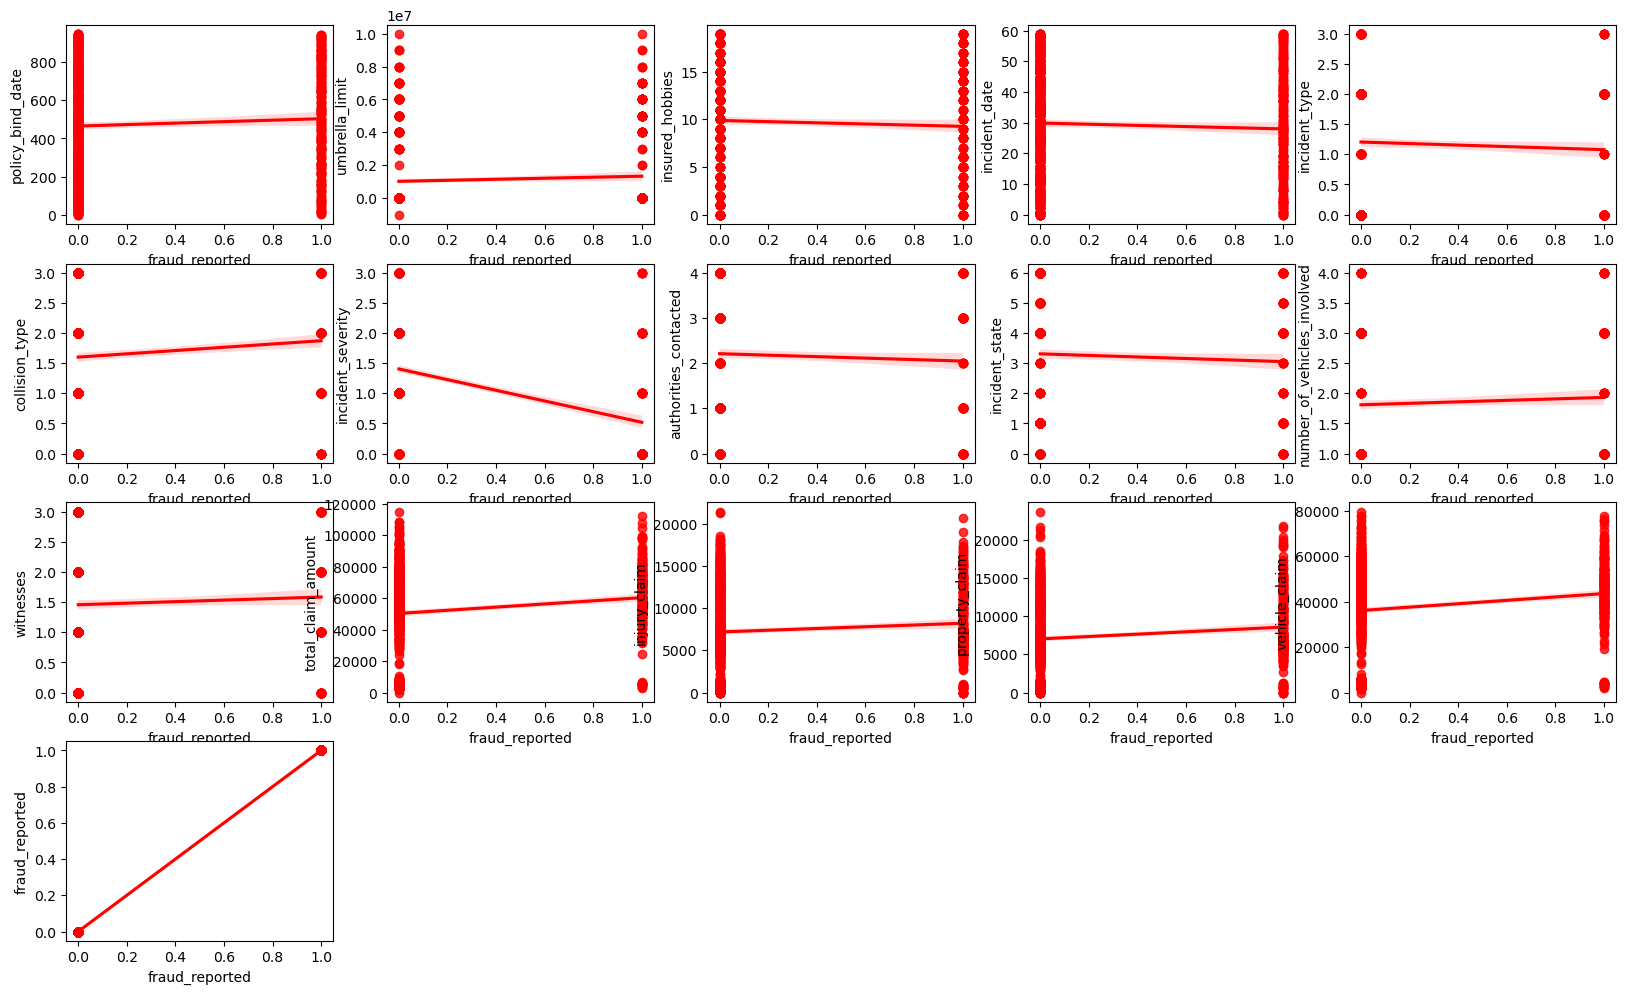

In [20]:
# Plot to check correlationship between features and label

plt.figure(figsize=(20,15))

p = 1

for i in df:
    if p <= 17:
        plt.subplot(5,5,p)
        snb.regplot(x='fraud_reported', y=i, data=df, color='r')
        plt.xlabel='fraud_reported'
        plt.ylabel=i
        
    p += 1

plt.show()

In [22]:
#Droping columns of no sgnificant relationship with the label
df.drop(columns=['policy_bind_date','umbrella_limit','number_of_vehicles_involved','incident_state','incident_type','witnesses','incident_date','insured_hobbies','authorities_contacted'], inplace=True)

In [23]:
df

,collision_type,incident_severity,total_claim_amount,injury_claim,property_claim,vehicle_claim,fraud_reported
0,3,0,71610,6510,13020,52080,1
1,0,1,5070,780,780,3510,1
2,2,1,34650,7700,3850,23100,0
3,1,0,63400,6340,6340,50720,1
4,0,1,6500,1300,650,4550,0
...,...,...,...,...,...,...,...
995,1,1,87200,17440,8720,61040,0
996,2,0,108480,18080,18080,72320,0
997,3,1,67500,7500,7500,52500,0
998,2,0,46980,5220,5220,36540,0


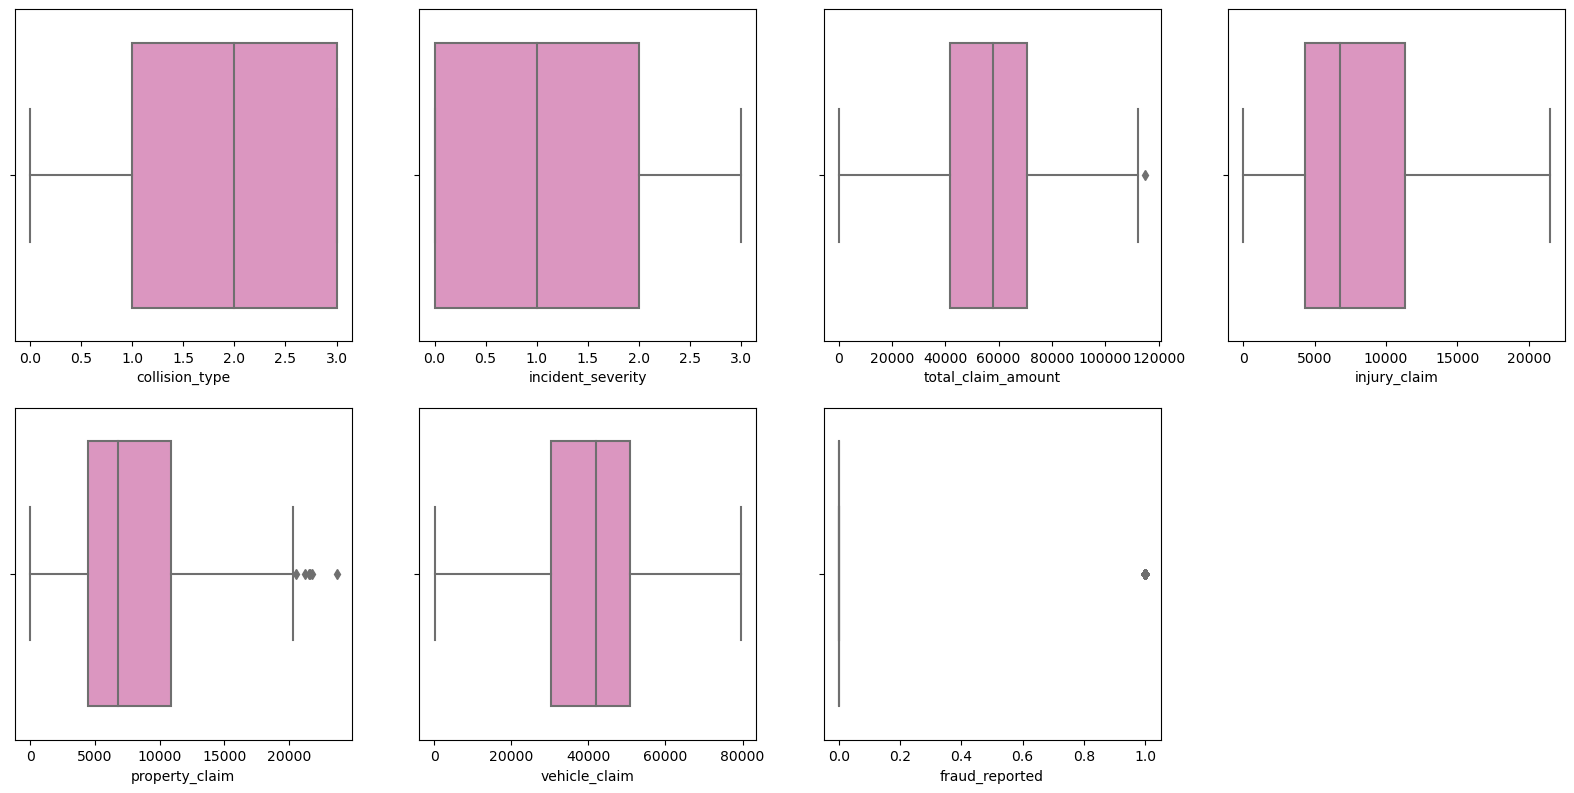

In [24]:
# Lets check for outliers using Boxplot

plt.figure(figsize=(20,25))

p=1

for i in df:
    if p<=19:
        plt.subplot(5,4,p)
        snb.boxplot(df[i], palette='Set2_r')
        plt.xlabel=i
        
    p+=1
    
plt.show()

Total_claim_amount and Property_claim showing some outliers. 



In [25]:
#removing the outliers using zscore

from scipy.stats import zscore

out_features = df[['incident_severity','property_claim']]
z=np.abs(zscore(out_features))

z

,incident_severity,property_claim
0,1.260614,1.165505
1,0.195906,1.372696
2,0.195906,0.736072
3,1.260614,0.219722
4,0.195906,1.399654
...,...,...
995,0.195906,0.273817
996,1.260614,2.214794
997,0.195906,0.020826
998,1.260614,0.451976


In [26]:
# Using Threshold of 3 to check for outliers

np.where(z>3)

(array([500]), array([1]))

In [27]:
df2 = df[(z<3).all(axis=1)]

df2

,collision_type,incident_severity,total_claim_amount,injury_claim,property_claim,vehicle_claim,fraud_reported
0,3,0,71610,6510,13020,52080,1
1,0,1,5070,780,780,3510,1
2,2,1,34650,7700,3850,23100,0
3,1,0,63400,6340,6340,50720,1
4,0,1,6500,1300,650,4550,0
...,...,...,...,...,...,...,...
995,1,1,87200,17440,8720,61040,0
996,2,0,108480,18080,18080,72320,0
997,3,1,67500,7500,7500,52500,0
998,2,0,46980,5220,5220,36540,0


In [28]:
print('the shape of old data: ',df.shape[0])
print('the shape of new data: ',df2.shape[0])

print('percentage data loss after removing outliers ', ((df.shape[0] - df2.shape[0])/df.shape[0])* 100)

the shape of old data:  1000
the shape of new data:  999
percentage data loss after removing outliers  0.1


Neglible data loss

<function matplotlib.pyplot.show(close=None, block=None)>

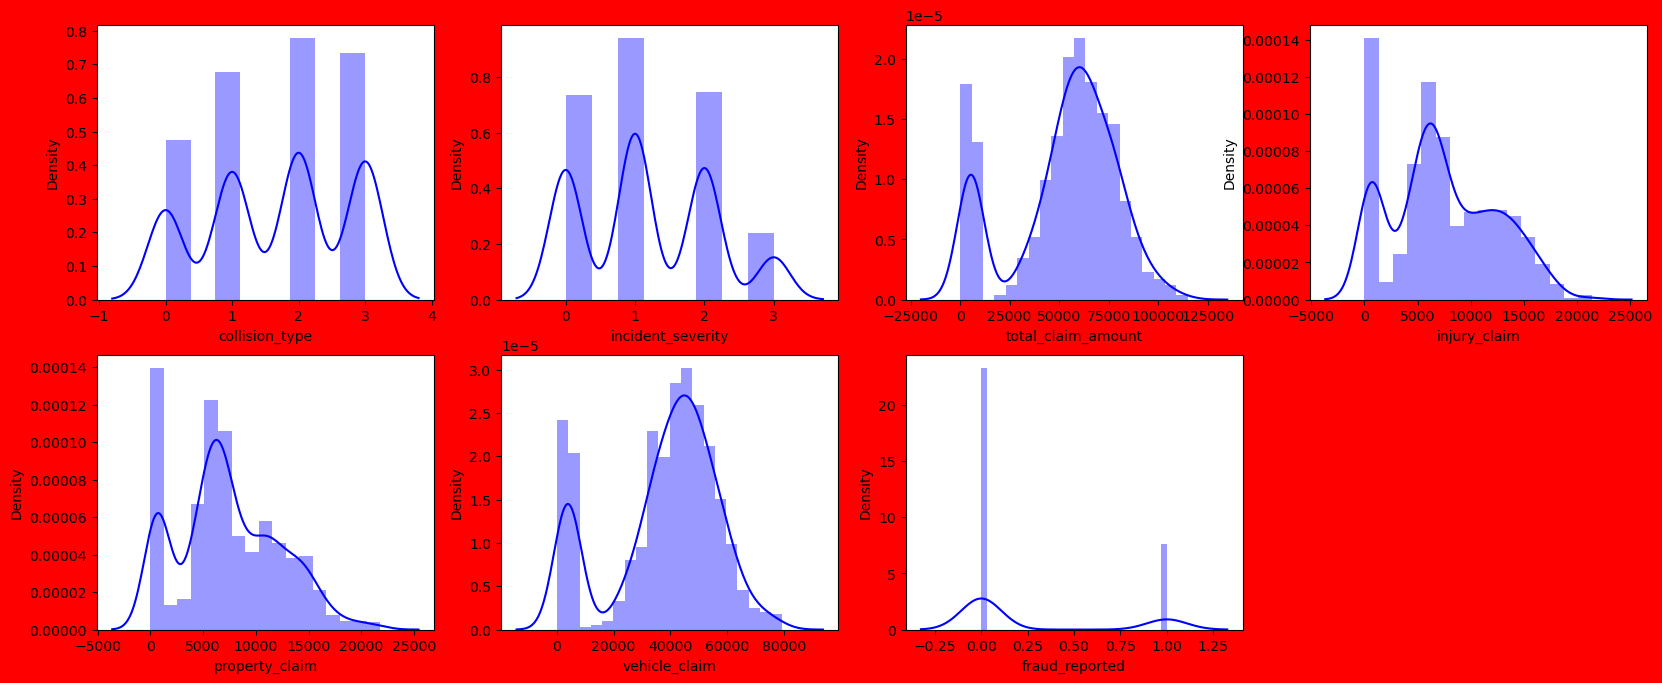

In [29]:
# Checking how data is distributed across columns and skewness

plt.figure(figsize=(20,25), facecolor='red')
p=1

for i in df2:
    if p<= 8:
        ax = plt.subplot(6,4,p)
        snb.distplot(df2[i], color='b')
        plt.xlabel=i
    p += 1
plt.show

In [31]:
df2.skew()

collision_type       -0.191913
incident_severity     0.278312
total_claim_amount   -0.594045
injury_claim          0.264963
property_claim        0.355621
vehicle_claim        -0.619587
fraud_reported        1.173510
dtype: float64

In [32]:
from sklearn.preprocessing import PowerTransformer

# Apply Yeo-Johnson transformation to the skewed column aside the label
pt = PowerTransformer(method='yeo-johnson')

for col in df2:
    if col != 'fraud_reported':
        if (df2[col].skew() < -0.5) or (df2[col].skew() > 0.5):
            df2[col] = pt.fit_transform(df2[col].values.reshape(-1, 1))        
df2.skew()

collision_type       -0.191913
incident_severity     0.278312
total_claim_amount   -0.510234
injury_claim          0.264963
property_claim        0.355621
vehicle_claim        -0.522265
fraud_reported        1.173510
dtype: float64

Fair enough to proceed with analysis


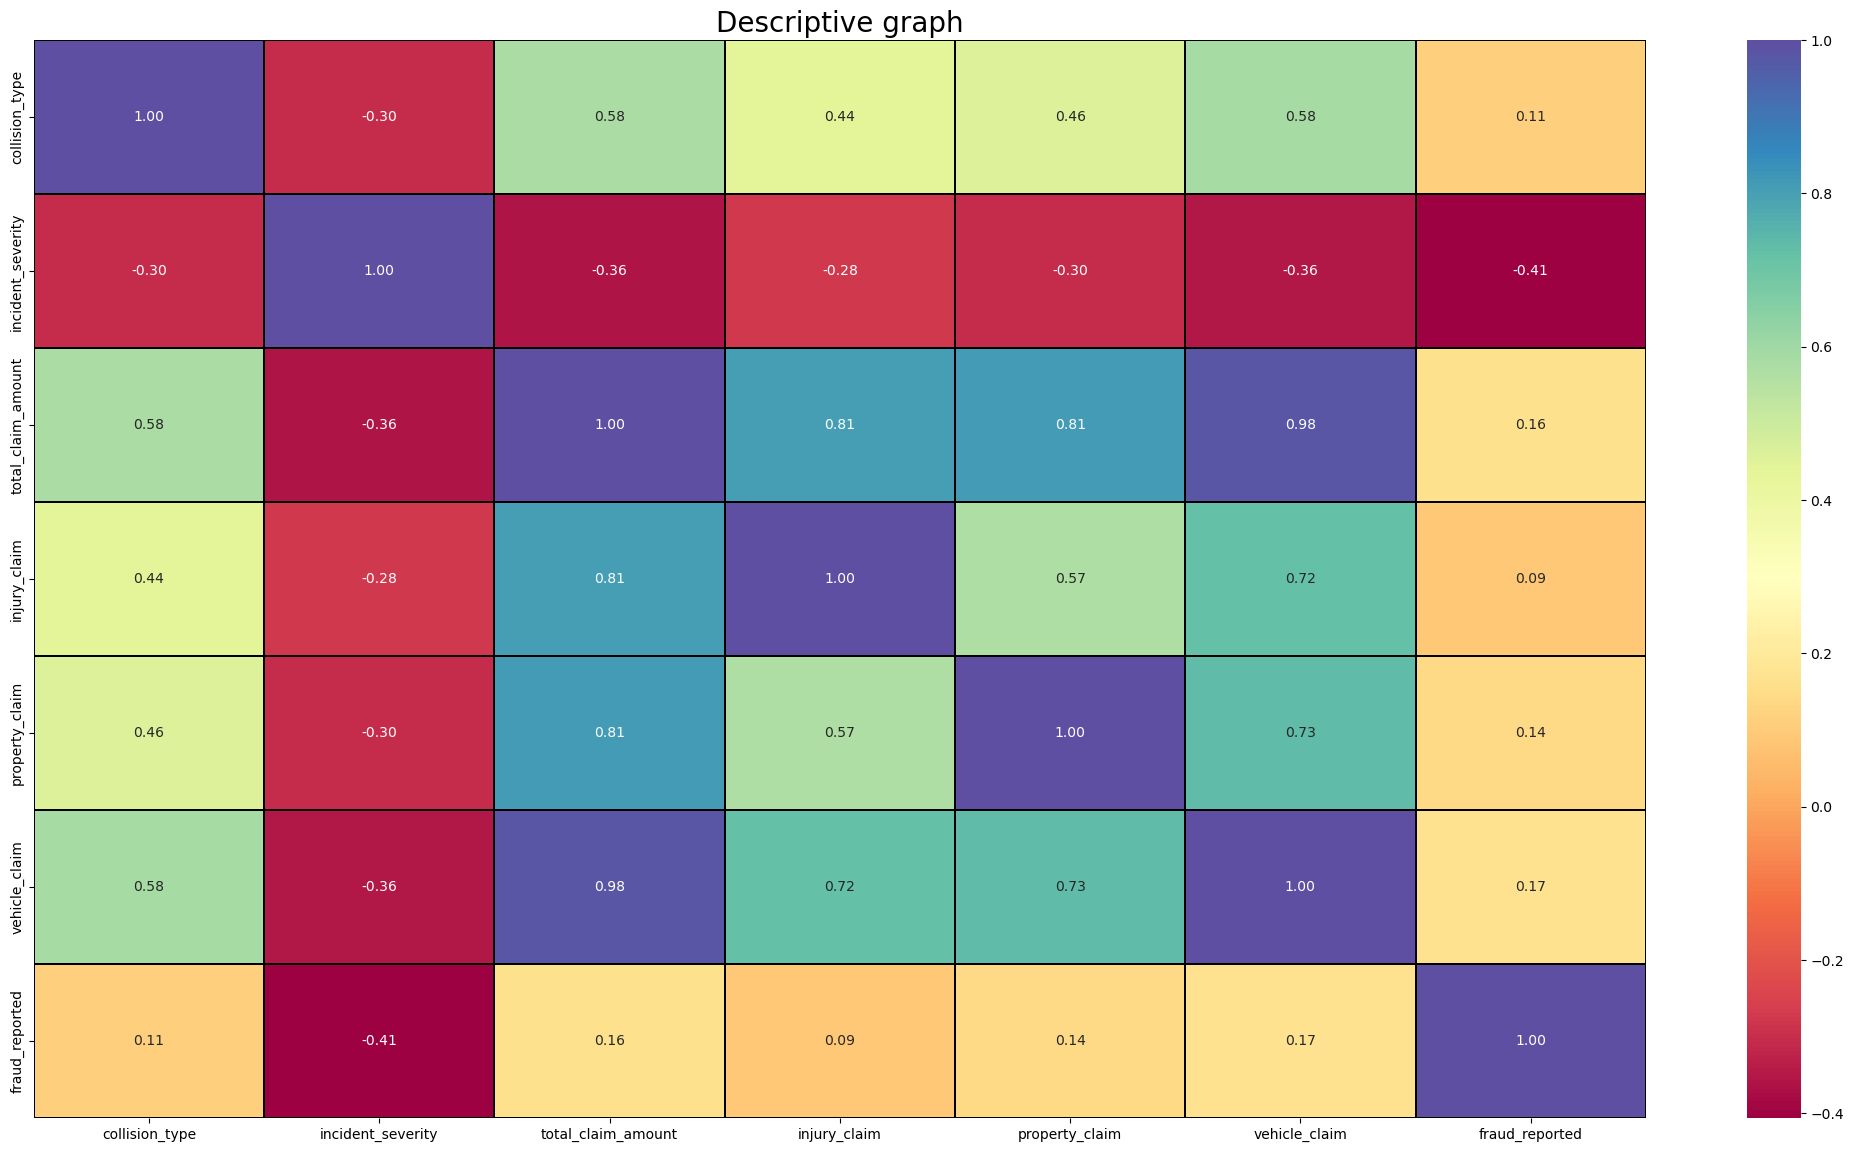

In [33]:
# Checking for multi-colinearity using heatmap
plt.figure(figsize=(26,14))
snb.heatmap(df2.corr(), annot=True, fmt='0.2f', linewidths=0.2, linecolor='black', cmap='Spectral')
plt.xlabel='figure'
plt.ylabel='feature name'
plt.title('Descriptive graph', fontsize=20)
plt.show()

Due to multicolinearity I will be droping property_claim and injury_claim

In [34]:
df2.drop(columns=['property_claim','injury_claim'], inplace=True)

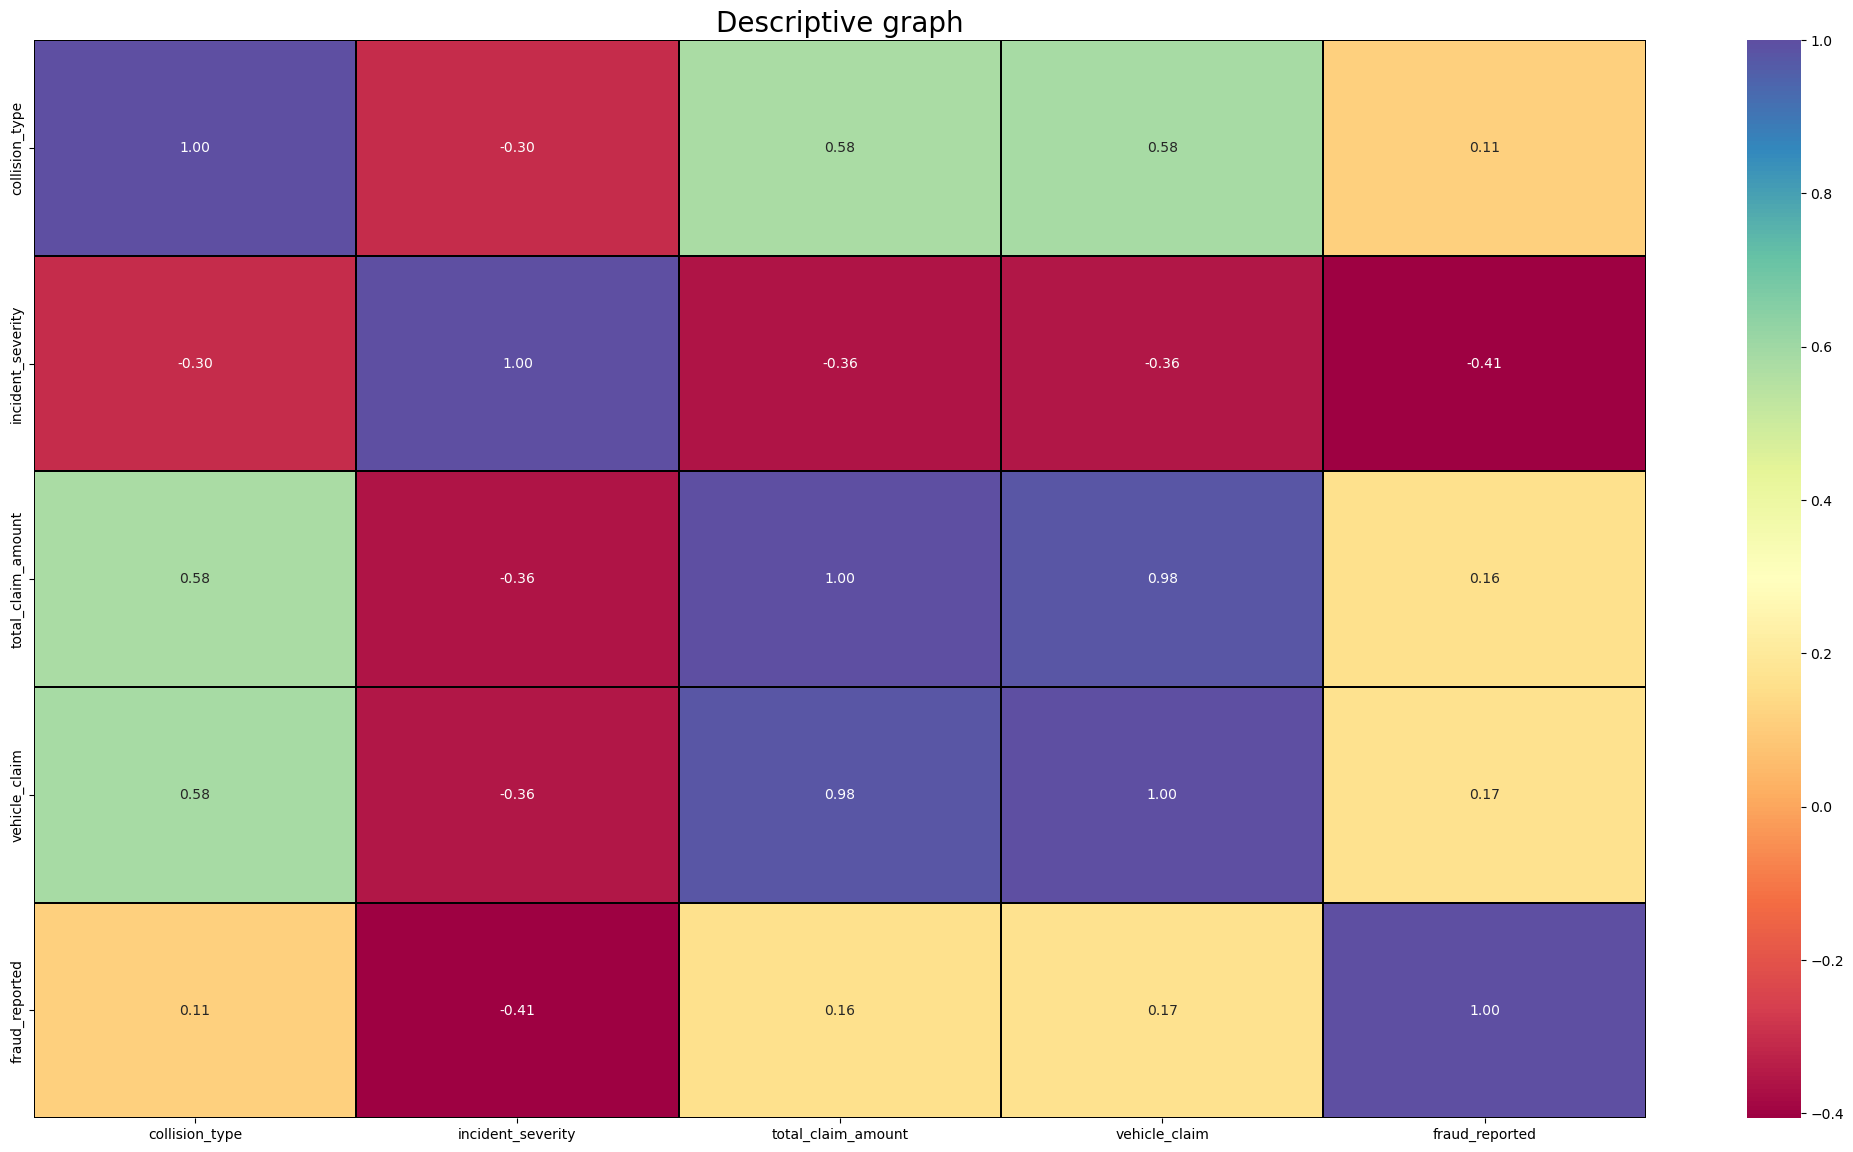

In [35]:
# Checking for multi-colinearity using heatmap
plt.figure(figsize=(26,14))
snb.heatmap(df2.corr(), annot=True, fmt='0.2f', linewidths=0.2, linecolor='black', cmap='Spectral')
plt.xlabel='figure'
plt.ylabel='feature name'
plt.title('Descriptive graph', fontsize=20)
plt.show()

There is multicolinearity between vehicle_claim and total_claim_amount, I will be droping total_claim_amount because vehicle claim contribute more to fraud_reported

In [36]:
df2.drop('total_claim_amount', axis=1, inplace=True)

In [37]:
#Seperate the label from feature

x = df2.drop('fraud_reported', axis =1)
y = df2['fraud_reported']

In [38]:
# feature scaling using standard scalarization to avoid biasness

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x= pd.DataFrame(scaler.fit_transform(x) , columns=x.columns)

x

,collision_type,incident_severity,vehicle_claim
0,1.256293,-1.260203,0.754540
1,-1.566129,-0.196008,-1.785998
2,0.315486,-0.196008,-0.819516
3,-0.625321,-1.260203,0.678496
4,-1.566129,-0.196008,-1.739320
...,...,...,...
994,-0.625321,-0.196008,1.259647
995,0.315486,-1.260203,1.904626
996,1.256293,-0.196008,0.778059
997,0.315486,-1.260203,-0.102977


In [39]:
# Check for variance inflation factor to further check for multicolinearity

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF Values'] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]

vif['Features'] = x.columns

vif

,VIF Values,Features
0,1.545014,collision_type
1,1.164094,incident_severity
2,1.604678,vehicle_claim


They are within acceptable threshold of not more than 5

In [40]:
# Checking for imbalance in the label column

y.value_counts()

0    752
1    247
Name: fraud_reported, dtype: int64

In [41]:
from imblearn.over_sampling import SMOTE
SM = SMOTE()

x,y = SM.fit_resample(x,y)

In [42]:
y.value_counts()

1    752
0    752
Name: fraud_reported, dtype: int64

In [43]:
#Classification problems algorithm

from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

maxAccu = 0
maxRS = 0

for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x,y ,test_size =0.30, random_state=i)
    RFR = RandomForestClassifier()
    RFR.fit(x_train, y_train)
    pred = RFR.predict(x_test)
    acc = accuracy_score(y_test, pred)
    if acc > maxAccu:
        maxAccu = acc
        maxRS = i
print('Best accuracy is : ', maxAccu, ' at random state : ',maxRS)

Best accuracy is :  0.7566371681415929  at random state :  153


In [44]:
#creating train test split

x_train, x_test, y_train, y_test = train_test_split(x,y ,test_size =0.30, random_state=maxRS)

In [45]:
#RandomForestClassifier
#checking accuracy for random forest classifier 

RFC = RandomForestClassifier()
RFC.fit(x_train, y_train)

predRFC = RFC.predict(x_test)
print(accuracy_score(y_test, predRFC))
print(confusion_matrix(y_test, predRFC))
print(classification_report(y_test, predRFC))

0.7566371681415929
[[178  38]
 [ 72 164]]
              precision    recall  f1-score   support

           0       0.71      0.82      0.76       216
           1       0.81      0.69      0.75       236

    accuracy                           0.76       452
   macro avg       0.76      0.76      0.76       452
weighted avg       0.76      0.76      0.76       452



In [46]:
#LogisticsRegression
#checking accuracy for LogisticsRegression  

LR = LogisticRegression()
LR.fit(x_train, y_train)

predLR = LR.predict(x_test)
print(accuracy_score(y_test, predLR))
print(confusion_matrix(y_test, predLR))
print(classification_report(y_test, predLR))

0.754424778761062
[[180  36]
 [ 75 161]]
              precision    recall  f1-score   support

           0       0.71      0.83      0.76       216
           1       0.82      0.68      0.74       236

    accuracy                           0.75       452
   macro avg       0.76      0.76      0.75       452
weighted avg       0.76      0.75      0.75       452



In [47]:
#AdaBoostClassifier
#checking accuracy for AdaboostClassifier 

AD = AdaBoostClassifier()
AD.fit(x_train, y_train)

predAD = AD.predict(x_test)
print(accuracy_score(y_test, predAD))
print(confusion_matrix(y_test, predAD))
print(classification_report(y_test, predAD))

0.7522123893805309
[[181  35]
 [ 77 159]]
              precision    recall  f1-score   support

           0       0.70      0.84      0.76       216
           1       0.82      0.67      0.74       236

    accuracy                           0.75       452
   macro avg       0.76      0.76      0.75       452
weighted avg       0.76      0.75      0.75       452



In [48]:
#ExtraTreeClassifier
#checking accuracy for ExtraTreeClassifier 

ET = ExtraTreesClassifier()
ET.fit(x_train, y_train)

predET = ET.predict(x_test)
print(accuracy_score(y_test, predET))
print(confusion_matrix(y_test, predET))
print(classification_report(y_test, predET))

0.75
[[176  40]
 [ 73 163]]
              precision    recall  f1-score   support

           0       0.71      0.81      0.76       216
           1       0.80      0.69      0.74       236

    accuracy                           0.75       452
   macro avg       0.75      0.75      0.75       452
weighted avg       0.76      0.75      0.75       452



In [49]:
# Validation accuracy score to be sure its not as a result of over fitting 

# Using Cross validation

from sklearn.model_selection import cross_val_score

score = cross_val_score(RFC,x,y)
print(score)
print(score.mean())
print('Difference between accuracy score and RandomForestClassifier is ', accuracy_score(y_test, predRFC) - score.mean())

[0.7076412  0.68106312 0.74418605 0.73754153 0.69666667]
0.713419712070875
Difference between accuracy score and RandomForestClassifier is  0.04321745607071792


In [50]:
score = cross_val_score(LR,x,y)
print(score)
print(score.mean())
print('Difference between accuracy score and LogisticsRegression is ', accuracy_score(y_test, predLR) - score.mean())

[0.74086379 0.73089701 0.74086379 0.75747508 0.75666667]
0.7453532668881506
Difference between accuracy score and LogisticsRegression is  0.009071511872911331


In [51]:
score = cross_val_score(AD,x,y)
print(score)
print(score.mean())
print('Difference between accuracy score and AdaboostClassifier is ', accuracy_score(y_test, predAD) - score.mean())

[0.76079734 0.75415282 0.76079734 0.76744186 0.76      ]
0.7606378737541529
Difference between accuracy score and AdaboostClassifier is  -0.008425484373622005


In [52]:
score = cross_val_score(ET,x,y)
print(score)
print(score.mean())
print('Difference between accuracy score and ExtraTreeClassifier is ', accuracy_score(y_test, predET) - score.mean())

[0.70431894 0.68106312 0.74750831 0.73089701 0.7       ]
0.7127574750830565
Difference between accuracy score and ExtraTreeClassifier is  0.037242524916943465


AdaboostClassifier is giving better score. I will go for AdaboostClassifier and apply hyperparameter tuning for better output posibility

In [53]:

#Hyper parameter Tunning 
#Type of cross validation method to get best values for model parameters IN THIS CASE ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

parameters = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1],
    'base_estimator': [None, DecisionTreeClassifier(max_depth=1), DecisionTreeClassifier(max_depth=2)],
    'algorithm': ['SAMME', 'SAMME.R']
}

GCV = GridSearchCV(AdaBoostClassifier(), parameters, cv = 5)

GCV.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'base_estimator': [None,
                                            DecisionTreeClassifier(max_depth=1),
                                            DecisionTreeClassifier(max_depth=2)],
                         'learning_rate': [0.01, 0.1, 1],
                         'n_estimators': [50, 100, 200]})

In [54]:
GCV.best_params_

{'algorithm': 'SAMME',
 'base_estimator': DecisionTreeClassifier(max_depth=2),
 'learning_rate': 1,
 'n_estimators': 50}

In [55]:
final_model = AdaBoostClassifier(algorithm = 'SAMME', base_estimator=DecisionTreeClassifier(max_depth=2), learning_rate = 1, n_estimators = 50)

In [56]:
final_model.fit(x_train, y_train)
pred = final_model.predict(x_test)

accuracy = accuracy_score(y_test, pred)

print(accuracy * 100)


77.87610619469027


we have a better score after hyperparameter tunning 

In [57]:
# Saving the model
# Using .pkl

import joblib
joblib.dump(final_model,'Fraud_Alert.pkl')

['Fraud_Alert.pkl']

In [61]:
# Lets load save model and get prediction

model = joblib.load('Fraud_Alert.pkl')

In [62]:
# Testing the loaded model
prediction = model.predict(x_test)
prediction

array([0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0,

In [63]:
a = np.array(y_test)
df_test = pd.DataFrame()

df_test['predicted'] = prediction
df_test['original'] = a

df_test

,predicted,original
0,0,0
1,1,1
2,1,1
3,1,1
4,0,0
...,...,...
447,1,1
448,1,1
449,0,0
450,0,0
